In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


**Importing necessary libraries **

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb



loading the training and test data


In [3]:
train= pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test= pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')


train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [4]:
train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
VendorID,175000.0,0.728377,0.445606,0.000000,0.000000,1.000000,1.000000,2.000000
passenger_count,168923.0,1.357678,0.891283,0.000000,1.000000,1.000000,1.000000,9.000000
trip_distance,175000.0,5.145930,394.971052,0.000000,1.080000,1.840000,3.610000,135182.060000
RatecodeID,168923.0,1.518307,6.514678,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,175000.0,132.710349,76.148799,1.000000,67.000000,133.000000,199.000000,264.000000
DOLocationID,175000.0,132.701429,76.192493,1.000000,67.000000,133.000000,199.000000,264.000000
extra,175000.0,1.932143,1.948497,-7.500000,0.000000,1.000000,2.500000,11.750000
tip_amount,175000.0,6.127497,4.610834,0.000079,3.473321,5.286217,7.502746,484.876151
tolls_amount,175000.0,0.646816,2.328274,-29.300000,0.000000,0.000000,0.000000,80.000000
improvement_surcharge,175000.0,0.979689,0.198775,-1.000000,1.000000,1.000000,1.000000,1.000000


Using the mean, max value and 75th percentile to identify possible outliers

Making a scatter plot for visual representation of the same

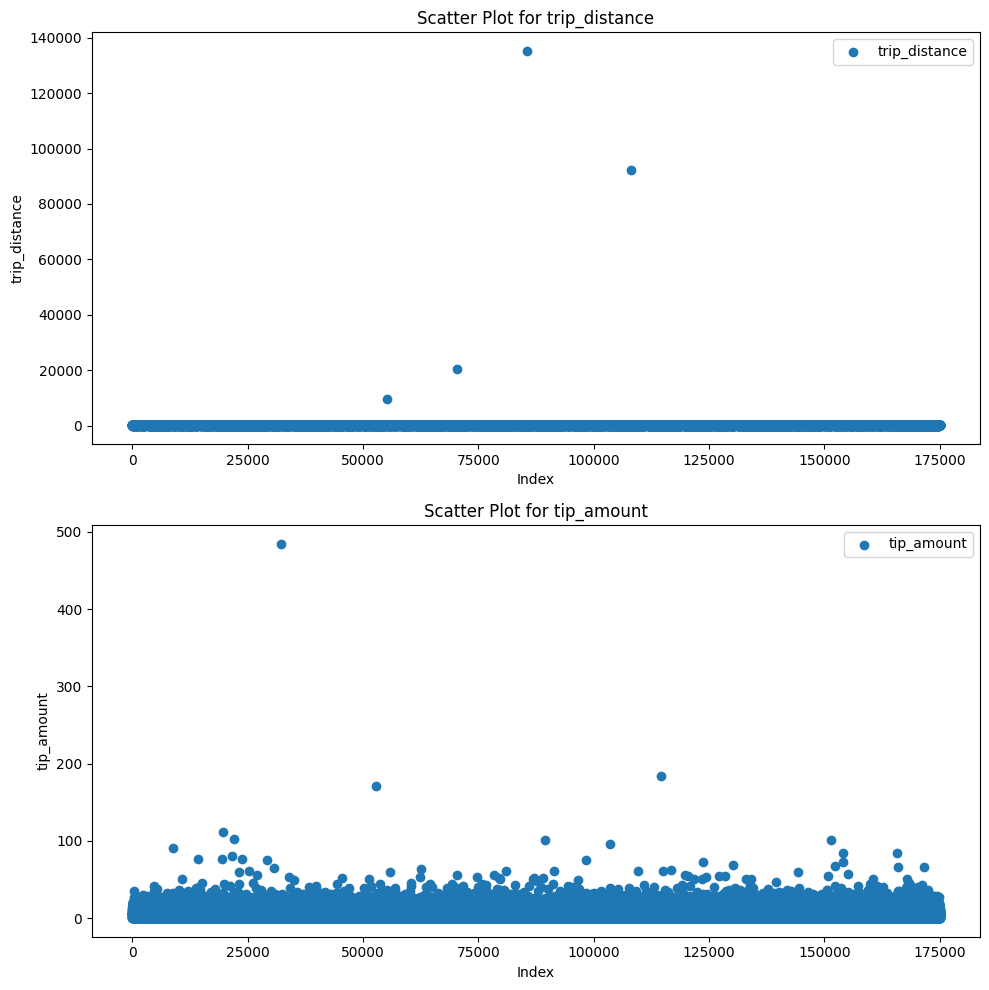

In [5]:

columns_to_plot = ['trip_distance', 'tip_amount']

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 10))

for i, column in enumerate(columns_to_plot):
    axes[i].scatter(train.index, train[column], label=column)

    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Scatter Plot for {column}')
    
    # Show legend
    axes[i].legend()

plt.tight_layout()

plt.show()


checking for possible relationships 

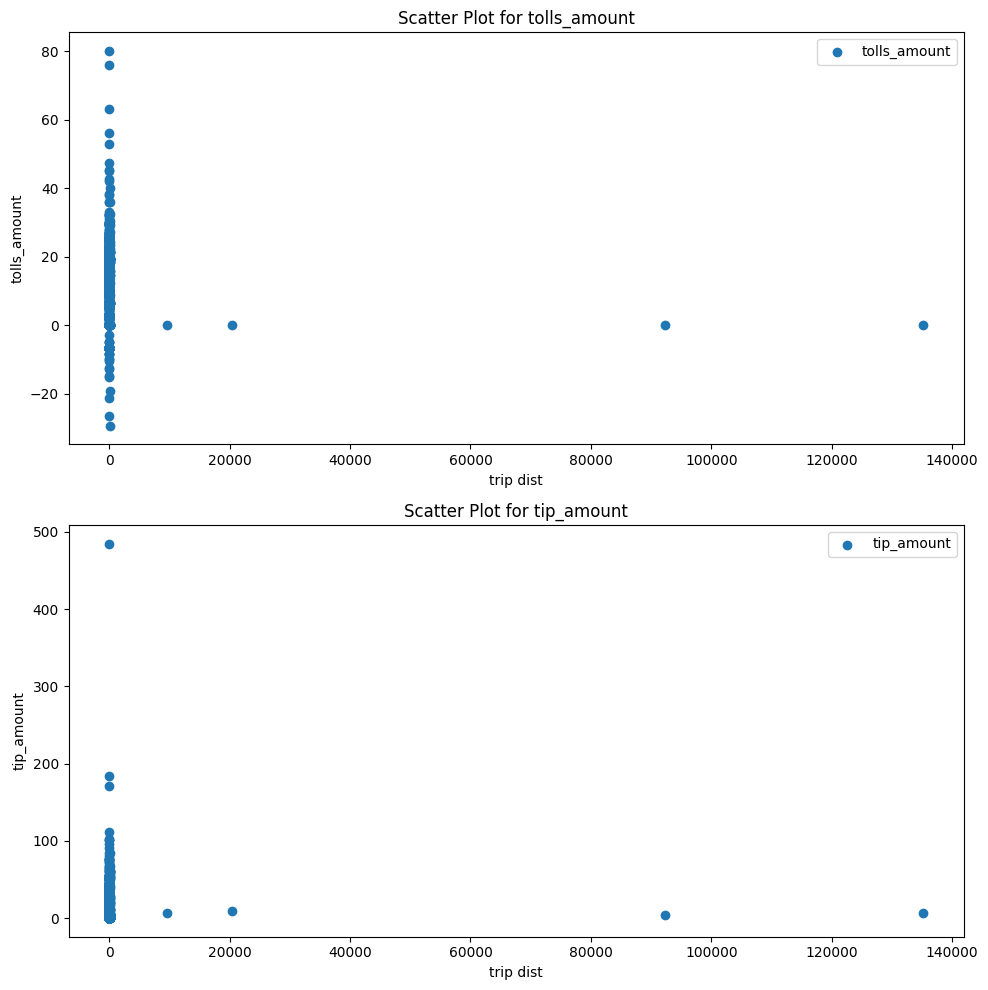

In [6]:

columns_to_plot = ['tolls_amount', 'tip_amount']

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 10))

for i, column in enumerate(columns_to_plot):
    axes[i].scatter(train['trip_distance'], train[column], label=column)

    axes[i].set_xlabel('trip dist')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Scatter Plot for {column}')
    
    axes[i].legend()

plt.tight_layout()

plt.show()


**Histograms for Numerical columns**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

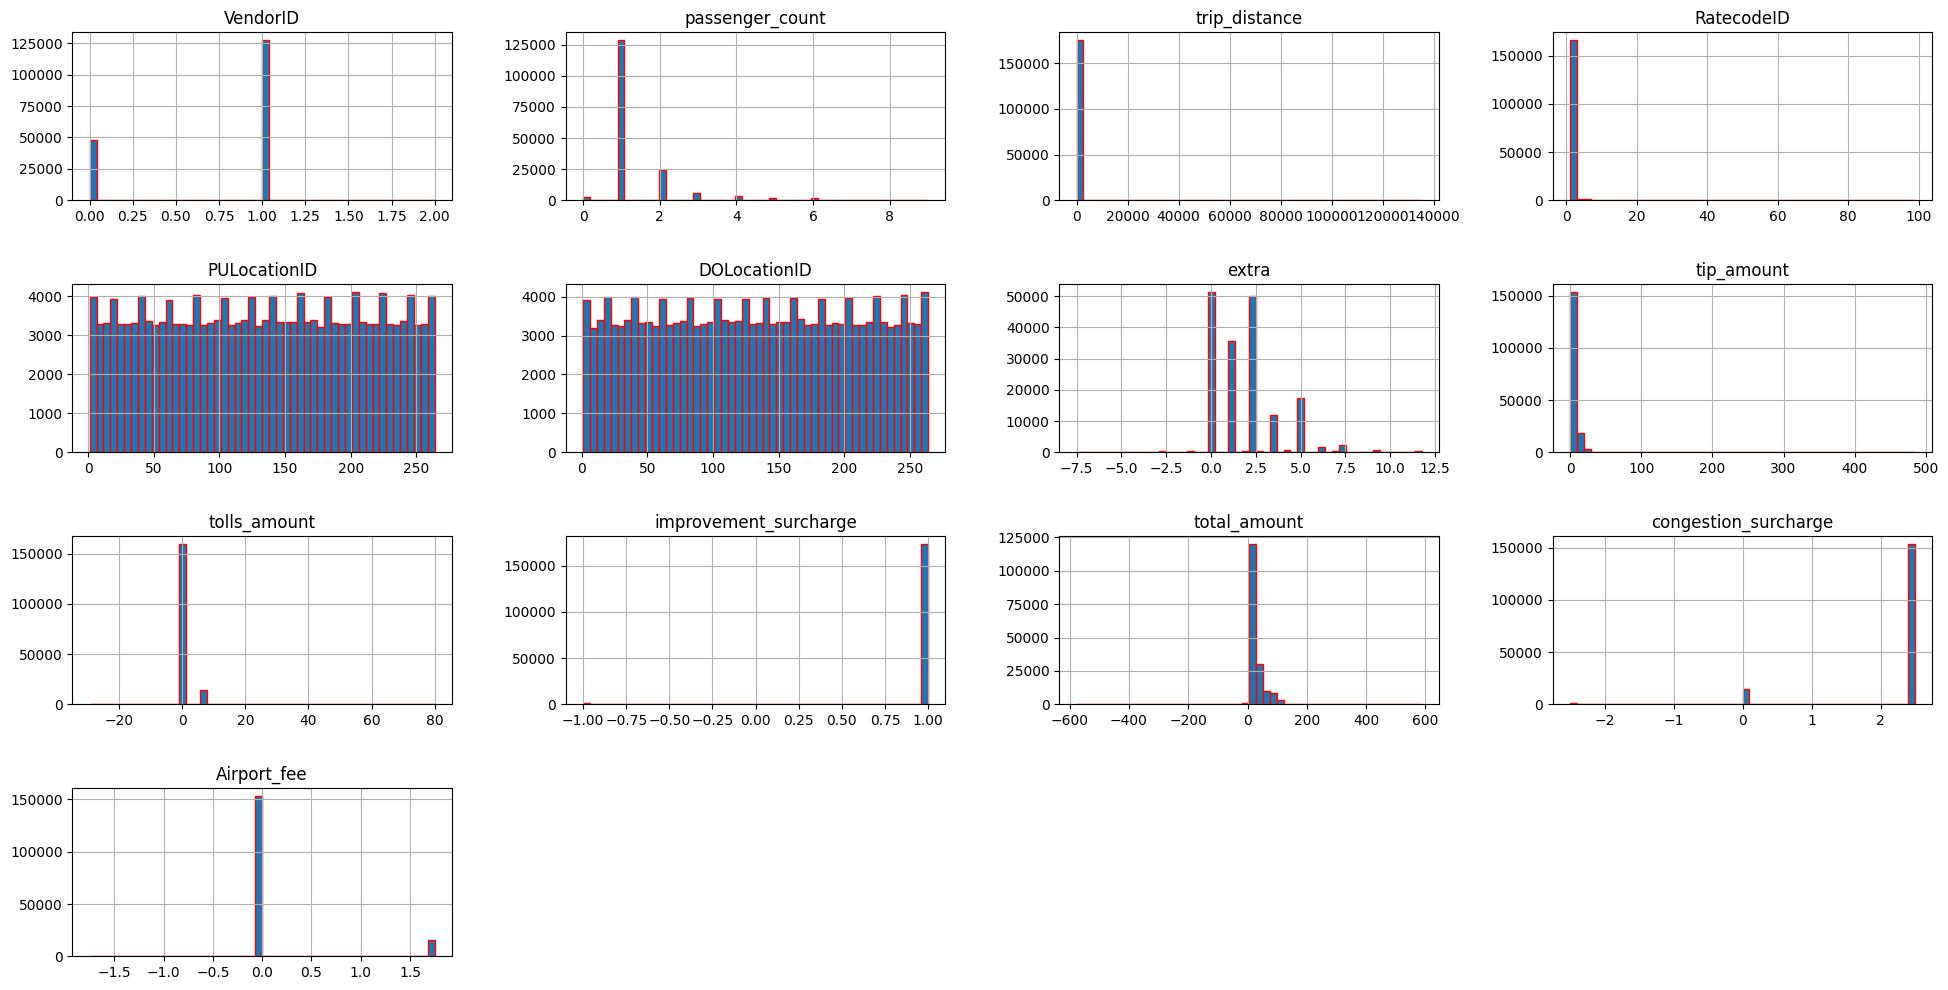

In [7]:
print(train.info())
train.hist(bins = 50, edgecolor = 'red', figsize=(24,12))
plt.subplots_adjust(hspace = 0.5,wspace = 0.3)
plt.show()

**Used sns for categorical columns **

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


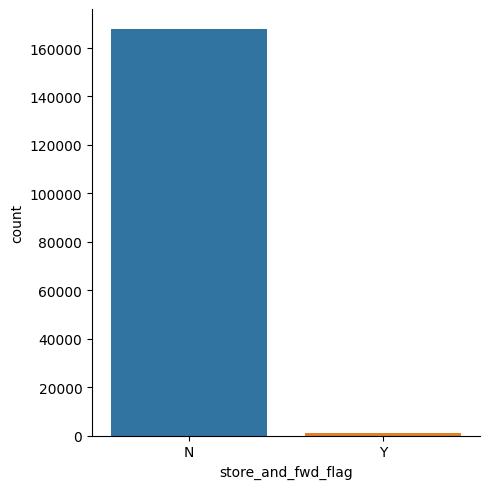

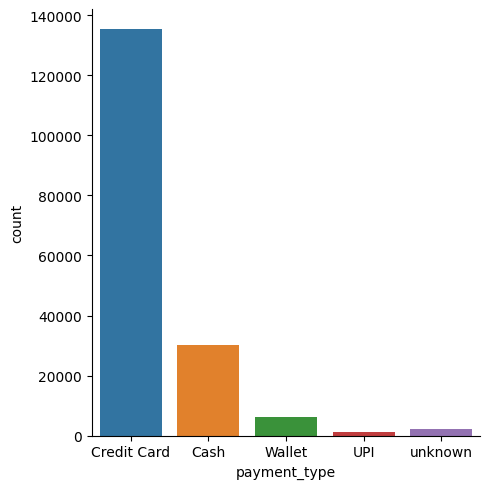

In [8]:
sns.catplot(data=train, x='store_and_fwd_flag', kind='count')
sns.catplot(data=train, x='payment_type', kind='count')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


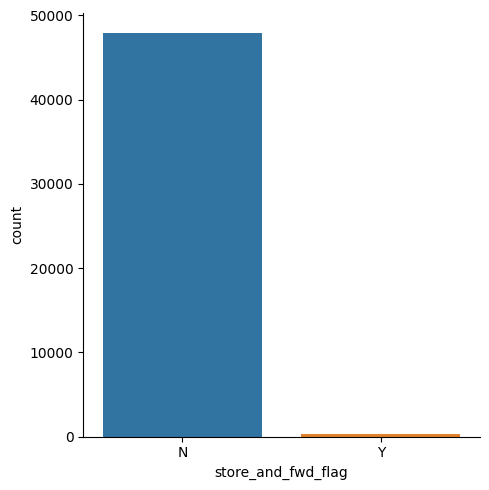

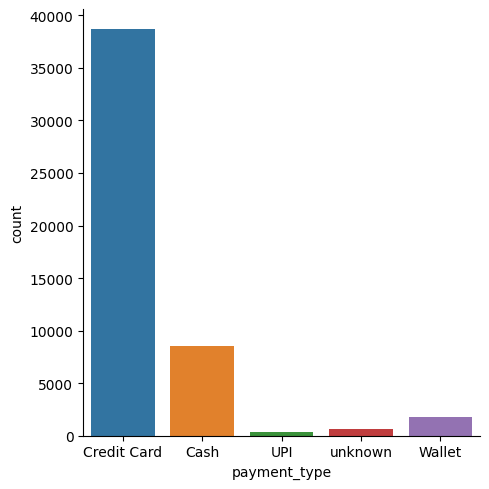

In [9]:
sns.catplot(data=test, x='store_and_fwd_flag', kind='count')
sns.catplot(data=test, x='payment_type', kind='count')

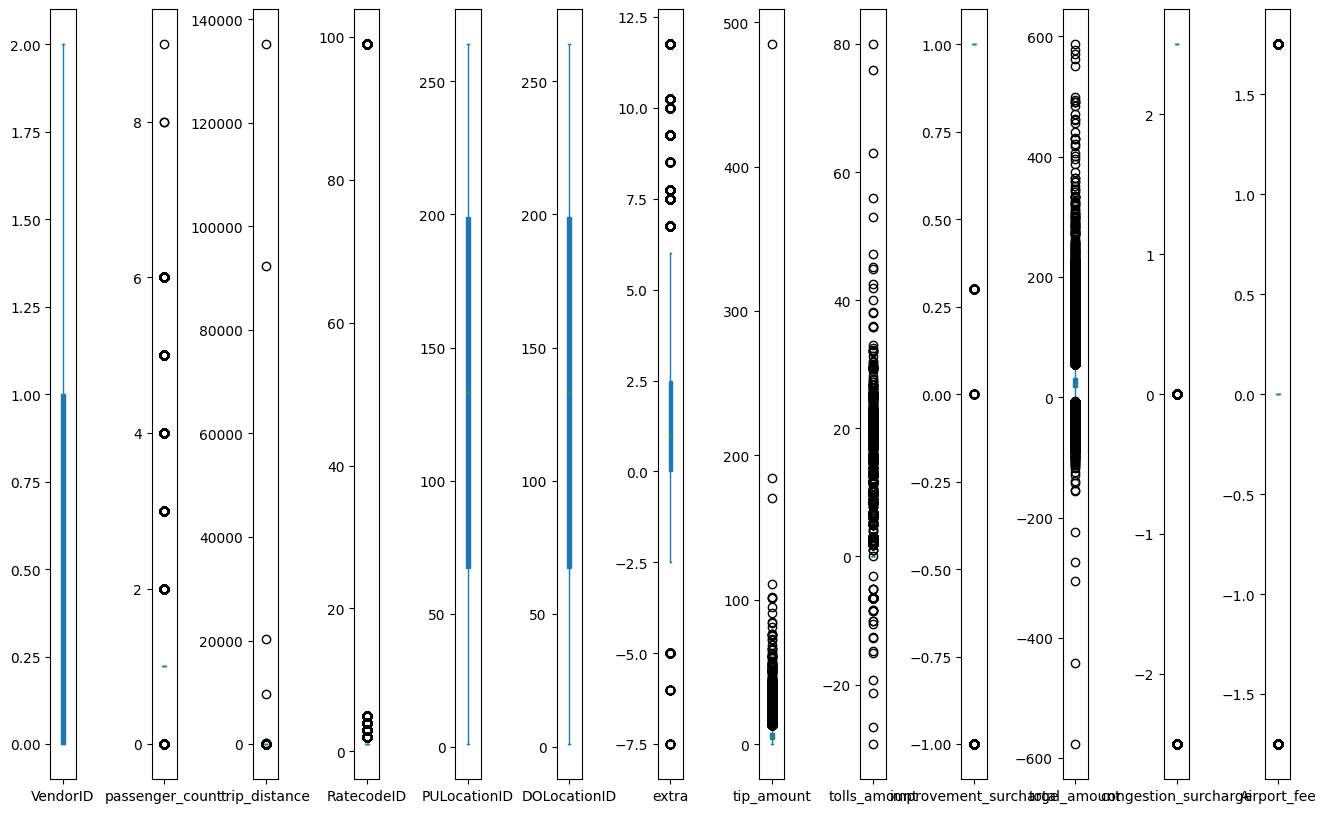

In [10]:
train.plot(kind='box',sharey = False, subplots=True, figsize=(16,10),patch_artist=True,return_type='both')
plt.subplots_adjust(wspace = 3)
plt.show()

In [11]:
train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
VendorID,175000.0,0.728377,0.445606,0.000000,0.000000,1.000000,1.000000,2.000000
passenger_count,168923.0,1.357678,0.891283,0.000000,1.000000,1.000000,1.000000,9.000000
trip_distance,175000.0,5.145930,394.971052,0.000000,1.080000,1.840000,3.610000,135182.060000
RatecodeID,168923.0,1.518307,6.514678,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,175000.0,132.710349,76.148799,1.000000,67.000000,133.000000,199.000000,264.000000
DOLocationID,175000.0,132.701429,76.192493,1.000000,67.000000,133.000000,199.000000,264.000000
extra,175000.0,1.932143,1.948497,-7.500000,0.000000,1.000000,2.500000,11.750000
tip_amount,175000.0,6.127497,4.610834,0.000079,3.473321,5.286217,7.502746,484.876151
tolls_amount,175000.0,0.646816,2.328274,-29.300000,0.000000,0.000000,0.000000,80.000000
improvement_surcharge,175000.0,0.979689,0.198775,-1.000000,1.000000,1.000000,1.000000,1.000000


# Removing outliers 

1. 1. As seen above from the scatter plot, trip distance more than 1000 does not make practical sense.
1. Hence, removed all the 4 outliers.
1. Similarly, tip amount greater than 200 also does not make practical sense, and can my considered as an outlier. 


In [12]:
train = train[train['trip_distance'] < 1000] 
train = train[train['tip_amount'] < 200]

****Checking for Null values ****

In [13]:
train.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6074
trip_distance               0
RatecodeID               6074
store_and_fwd_flag       6074
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6074
Airport_fee              6074
dtype: int64

Since Rate code is an ID, mode is used instead of mean to avoid float values durinng imputing missing values.

In [14]:
train['RatecodeID'].unique()

array([ 1., 99.,  3., nan,  2.,  5.,  4.])

Filling missing values 

In [15]:
categorical_cols = ['payment_type','store_and_fwd_flag','RatecodeID']
train[categorical_cols] = train[categorical_cols].fillna(train[categorical_cols].mode().iloc[0])

In [16]:
categorical_cols1 = ['payment_type','store_and_fwd_flag','RatecodeID']
test[categorical_cols1] = test[categorical_cols1].fillna(test[categorical_cols1].mode().iloc[0])

In [17]:
numcols = train.select_dtypes(include = 'number').columns.to_list()
numsi = SimpleImputer(strategy= 'mean')
train[numcols]= numsi.fit_transform(train[numcols])

In [18]:
numcols1 = test.select_dtypes(include = 'number').columns.to_list()
numsi = SimpleImputer(strategy= 'mean')
test[numcols1]= numsi.fit_transform(test[numcols1])

In [19]:
train.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

# replacing unknown with credit card

Payment type 'unknown' is replaced with it's mode value. 

In [20]:
train['payment_type'].replace('unknown', 'Credit Card', inplace = True)
train['store_and_fwd_flag'].unique()
# print(len(train[train['store_and_fwd_flag']=='Y']))

array(['N', 'Y'], dtype=object)

In [21]:
test['payment_type'].replace('unknown', 'Credit Card', inplace = True)
test['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


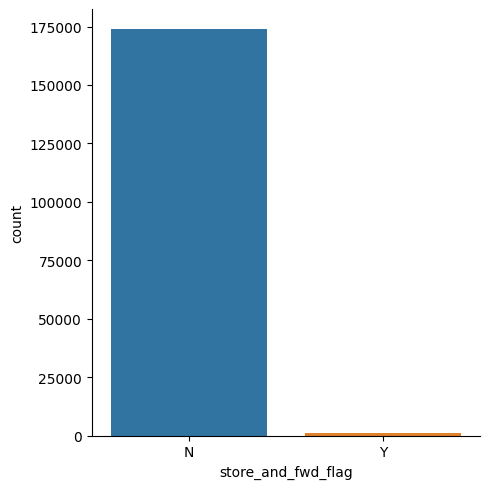

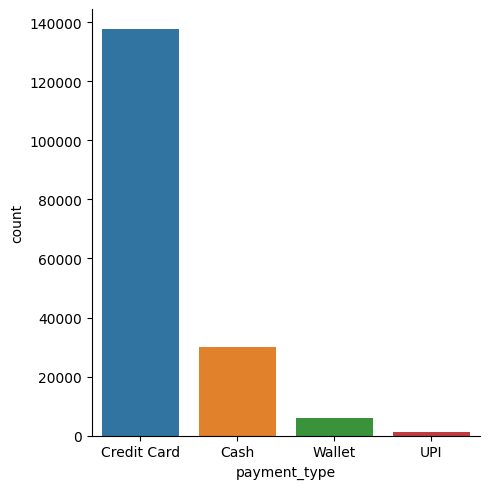

In [22]:
sns.catplot(data=train, x='store_and_fwd_flag', kind='count')
sns.catplot(data=train, x='payment_type', kind='count')

# Handling Outliers and negative values

Using IQR method to remove outliers caused a lot of data loss and poor model perfomance. Hence, discarded this method. 


In [23]:
# iqr_multiplier = 1.5

# # Function to remove outliers using IQR for specific columns
# def remove_outliers_iqr(data, columns):
#     for column in columns:
#         Q1 = data[column].quantile(0.25)
#         Q3 = data[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - iqr_multiplier * IQR
#         upper_bound = Q3 + iqr_multiplier * IQR
#         data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
#     return data
# # Specify columns for which you want to remove outliers
# columns_to_remove_outliers = ['trip_distance', 'passenger_count','tip_amount','total_amount']
# columns_to_remove_outliers += ['extra', 'Airport_fee','improvement_surcharge','congestion_surcharge']

# # Remove outliers using IQR for specified columns
# train_lr = remove_outliers_iqr(train, columns_to_remove_outliers)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174995 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               174995 non-null  float64
 1   tpep_pickup_datetime   174995 non-null  object 
 2   tpep_dropoff_datetime  174995 non-null  object 
 3   passenger_count        174995 non-null  float64
 4   trip_distance          174995 non-null  float64
 5   RatecodeID             174995 non-null  float64
 6   store_and_fwd_flag     174995 non-null  object 
 7   PULocationID           174995 non-null  float64
 8   DOLocationID           174995 non-null  float64
 9   payment_type           174995 non-null  object 
 10  extra                  174995 non-null  float64
 11  tip_amount             174995 non-null  float64
 12  tolls_amount           174995 non-null  float64
 13  improvement_surcharge  174995 non-null  float64
 14  total_amount           174995 non-null  f

In [25]:
# train=train[train['Airport_fee']>=0]
# train=train[train['congestion_surcharge']>=0]
# train=train[train['improvement_surcharge']>=0]
# train=train[train['passenger_count']>0]
# train=train[train['passenger_count']<7]

# train.shape

pickup and drop time

# Handling DateTime

tpep_pickup_datetime and tpep_dropoff_datetime are of objecct type. So, they are first converted into datetime type, and then split into hours, minutes and seconds using the split function. 

In [26]:
#split pickup datetime to pickupdate and pickuptime


# Convert the 'datetime_column' to datetime type
train['tpep_pickup_datetime'] = pd.to_datetime(train['tpep_pickup_datetime'])

# Split the datetime column into separate date and time columns
train['pickupdate'] = train['tpep_pickup_datetime'].dt.date
train['pickuptime'] = train['tpep_pickup_datetime'].dt.time

# Print the updated DataFrame
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickupdate,pickuptime
0,1.0,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120.0,9.0,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,2023-06-28,17:20:21
1,0.0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15.0,215.0,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,2023-06-29,23:05:01
2,1.0,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167.0,223.0,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,2023-06-30,10:19:31
3,0.0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128.0,239.0,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,2023-06-29,13:23:09
4,1.0,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203.0,52.0,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,2023-06-29,22:03:32


In [27]:
#Doing the same for Drop time
train['tpep_dropoff_datetime'] = pd.to_datetime(train['tpep_dropoff_datetime'])

train['dropdate'] = train['tpep_dropoff_datetime'].dt.date
train['droptime'] = train['tpep_dropoff_datetime'].dt.time

train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickupdate,pickuptime,dropdate,droptime
0,1.0,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120.0,9.0,Credit Card,...,7.165589,0.0,1.0,20.64,2.5,0.0,2023-06-28,17:20:21,2023-06-28,16:34:45
1,0.0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15.0,215.0,Credit Card,...,6.067401,0.0,1.0,25.55,2.5,0.0,2023-06-29,23:05:01,2023-06-29,22:01:35
2,1.0,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167.0,223.0,Credit Card,...,4.111547,0.0,1.0,17.64,2.5,0.0,2023-06-30,10:19:31,2023-06-30,11:13:10
3,0.0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128.0,239.0,Credit Card,...,6.411079,0.0,1.0,12.80,2.5,0.0,2023-06-29,13:23:09,2023-06-29,14:20:01
4,1.0,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203.0,52.0,Credit Card,...,4.769377,0.0,1.0,18.00,2.5,0.0,2023-06-29,22:03:32,2023-06-29,22:22:22


Dropped pickup and drop dates

In [28]:
train= train.drop(columns = ['tpep_pickup_datetime','tpep_dropoff_datetime']) 
train= train.drop(columns = ['pickupdate','dropdate']) #Since there only 4 dates, there was no need to keep them. 

Converting them to string type so the splitting can be done.

In [29]:
train['pickuptime']=train['pickuptime'].astype(str)

In [30]:
train['droptime']=train['droptime'].astype(str)

In [31]:
#Done the same thing for test set 
#for pickup 
test['tpep_pickup_datetime'] = pd.to_datetime(test['tpep_pickup_datetime'])

test['pickupdate'] = test['tpep_pickup_datetime'].dt.date
test['pickuptime'] = test['tpep_pickup_datetime'].dt.time

test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,pickupdate,pickuptime
0,1.0,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20.0,3.0,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0,2023-06-29,00:21:20
1,1.0,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9.0,81.0,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0,2023-06-30,17:44:43
2,1.0,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92.0,90.0,Cash,2.5,3.983872,0.0,1.0,2.5,0.0,2023-06-29,18:17:04
3,0.0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19.0,102.0,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0,2023-06-30,21:33:53
4,1.0,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131.0,229.0,Cash,0.0,1.468943,0.0,1.0,0.0,0.0,2023-06-29,14:53:54


In [32]:
#for drop
test['tpep_dropoff_datetime'] = pd.to_datetime(test['tpep_dropoff_datetime'])

test['dropdate'] = test['tpep_dropoff_datetime'].dt.date
test['droptime'] = test['tpep_dropoff_datetime'].dt.time

# test.head()

In [33]:
test['pickuptime']=test['pickuptime'].astype(str)

In [34]:
test['droptime']=test['droptime'].astype(str)

Splitting using ':' as the delimiter 

In [35]:

# Split the 'TimeColumn' into hours, minutes, and seconds
train[['Hour', 'Minute', 'Second']] = train['pickuptime'].str.split(':', expand=True)

# Convert hours, minutes, and seconds to integers
train[['Hour', 'Minute', 'Second']] = train[['Hour', 'Minute', 'Second']].astype(int)

# Calculate total hours
train['Pickup_TotalHours'] = train['Hour'] + train['Minute'] / 60 + train['Second'] / 3600

# Display the DataFrame after conversion
print("\nAfter Conversion:")
print(train[['pickuptime', 'Pickup_TotalHours']])



After Conversion:
       pickuptime  Pickup_TotalHours
0        17:20:21          17.339167
1        23:05:01          23.083611
2        10:19:31          10.325278
3        13:23:09          13.385833
4        22:03:32          22.058889
...           ...                ...
174995   22:50:57          22.849167
174996   13:03:33          13.059167
174997   11:03:32          11.058889
174998   19:47:17          19.788056
174999   21:26:43          21.445278

[174995 rows x 2 columns]


In [36]:

# Split the 'TimeColumn' into hours, minutes, and seconds
test[['Hour', 'Minute', 'Second']] = test['pickuptime'].str.split(':', expand=True)

# Convert hours, minutes, and seconds to integers
test[['Hour', 'Minute', 'Second']] = test[['Hour', 'Minute', 'Second']].astype(int)

# Calculate total hours
test['Pickup_TotalHours'] = test['Hour'] + test['Minute'] / 60 + test['Second'] / 3600

# Display the DataFrame after conversion
print("\nAfter Conversion:")
print(test[['pickuptime', 'Pickup_TotalHours']])



After Conversion:
      pickuptime  Pickup_TotalHours
0       00:21:20           0.355556
1       17:44:43          17.745278
2       18:17:04          18.284444
3       21:33:53          21.564722
4       14:53:54          14.898333
...          ...                ...
49995   17:41:59          17.699722
49996   01:25:25           1.423611
49997   22:28:44          22.478889
49998   02:37:18           2.621667
49999   18:05:15          18.087500

[50000 rows x 2 columns]


In [37]:
#Doing the same thing for the drop time of the train and test set 
# Split the 'TimeColumn' into hours, minutes, and seconds
train[['Hour', 'Minute', 'Second']] = train['droptime'].str.split(':', expand=True)

# Convert hours, minutes, and seconds to integers
train[['Hour', 'Minute', 'Second']] = train[['Hour', 'Minute', 'Second']].astype(int)

# Calculate total hours
train['Drop_TotalHours'] = train['Hour'] + train['Minute'] / 60 + train['Second'] / 3600

# Display the DataFrame after conversion
print("\nAfter Conversion:")
print(train[['droptime', 'Drop_TotalHours']])



After Conversion:
        droptime  Drop_TotalHours
0       16:34:45        16.579167
1       22:01:35        22.026389
2       11:13:10        11.219444
3       14:20:01        14.333611
4       22:22:22        22.372778
...          ...              ...
174995  22:22:22        22.372778
174996  14:04:57        14.082500
174997  12:13:34        12.226111
174998  19:08:55        19.148611
174999  22:54:42        22.911667

[174995 rows x 2 columns]


In [38]:

# Split the 'TimeColumn' into hours, minutes, and seconds
test[['Hour', 'Minute', 'Second']] = test['droptime'].str.split(':', expand=True)

# Convert hours, minutes, and seconds to integers
test[['Hour', 'Minute', 'Second']] = test[['Hour', 'Minute', 'Second']].astype(int)

# Calculate total hours
test['Drop_TotalHours'] = test['Hour'] + test['Minute'] / 60 + test['Second'] / 3600

# Display the DataFrame after conversion
print("\nAfter Conversion:")
print(test[['droptime', 'Drop_TotalHours']])



After Conversion:
       droptime  Drop_TotalHours
0      00:25:20         0.422222
1      17:53:13        17.886944
2      19:23:48        19.396667
3      21:46:20        21.772222
4      15:22:17        15.371389
...         ...              ...
49995  18:30:36        18.510000
49996  01:10:40         1.177778
49997  21:49:37        21.826944
49998  02:10:33         2.175833
49999  17:15:16        17.254444

[50000 rows x 2 columns]


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174995 entries, 0 to 174999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               174995 non-null  float64
 1   passenger_count        174995 non-null  float64
 2   trip_distance          174995 non-null  float64
 3   RatecodeID             174995 non-null  float64
 4   store_and_fwd_flag     174995 non-null  object 
 5   PULocationID           174995 non-null  float64
 6   DOLocationID           174995 non-null  float64
 7   payment_type           174995 non-null  object 
 8   extra                  174995 non-null  float64
 9   tip_amount             174995 non-null  float64
 10  tolls_amount           174995 non-null  float64
 11  improvement_surcharge  174995 non-null  float64
 12  total_amount           174995 non-null  float64
 13  congestion_surcharge   174995 non-null  float64
 14  Airport_fee            174995 non-null  f

In [40]:
train['travel_time'] = (train['Pickup_TotalHours'])- (train['Drop_TotalHours'])
train['travel_time']=train['travel_time'].abs()

In [41]:
test['travel_time'] = (test['Pickup_TotalHours'])- (test['Drop_TotalHours'])
test['travel_time']=test['travel_time'].abs()

In [42]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,174995.0,0.728375,0.445607,0.000000,0.000000,1.000000,1.000000,2.000000
passenger_count,174995.0,1.357682,0.875682,0.000000,1.000000,1.000000,1.000000,9.000000
trip_distance,174995.0,3.674802,4.879870,0.000000,1.080000,1.840000,3.610000,143.350000
RatecodeID,174995.0,1.500323,6.401359,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,174995.0,132.710712,76.148907,1.000000,67.000000,133.000000,199.000000,264.000000
DOLocationID,174995.0,132.702471,76.192411,1.000000,67.000000,133.000000,199.000000,264.000000
extra,174995.0,1.932193,1.948502,-7.500000,0.000000,1.000000,2.500000,11.750000
tip_amount,174995.0,6.124753,4.466602,0.000079,3.473285,5.286179,7.502701,184.313458
tolls_amount,174995.0,0.646835,2.328305,-29.300000,0.000000,0.000000,0.000000,80.000000
improvement_surcharge,174995.0,0.979688,0.198778,-1.000000,1.000000,1.000000,1.000000,1.000000


dropping columns that are no longer required 

In [43]:
train=train.drop(columns=['pickuptime','droptime','Hour', 'Minute', 'Second'])

In [44]:
test=test.drop(columns=['pickuptime','droptime','Hour', 'Minute', 'Second'])


In [45]:
test=test.drop(columns=['pickupdate', 'dropdate'])


In [46]:
train.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'Pickup_TotalHours', 'Drop_TotalHours', 'travel_time'],
      dtype='object')

In [47]:
test.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'Pickup_TotalHours', 'Drop_TotalHours', 'travel_time'],
      dtype='object')

In [48]:
test=test.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])


In [49]:
train.shape

(174995, 18)

In [50]:
test.shape

(50000, 17)

# **Converting categorical text based data into numerical form **

In [51]:
le=LabelEncoder()
train['payment_type']= le.fit_transform(train['payment_type'])
train['store_and_fwd_flag'] = le.fit_transform(train['store_and_fwd_flag'])

In [52]:

le=LabelEncoder()
test['payment_type']= le.fit_transform(test['payment_type'])
test['store_and_fwd_flag'] = le.fit_transform(test['store_and_fwd_flag'])

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174995 entries, 0 to 174999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               174995 non-null  float64
 1   passenger_count        174995 non-null  float64
 2   trip_distance          174995 non-null  float64
 3   RatecodeID             174995 non-null  float64
 4   store_and_fwd_flag     174995 non-null  int64  
 5   PULocationID           174995 non-null  float64
 6   DOLocationID           174995 non-null  float64
 7   payment_type           174995 non-null  int64  
 8   extra                  174995 non-null  float64
 9   tip_amount             174995 non-null  float64
 10  tolls_amount           174995 non-null  float64
 11  improvement_surcharge  174995 non-null  float64
 12  total_amount           174995 non-null  float64
 13  congestion_surcharge   174995 non-null  float64
 14  Airport_fee            174995 non-null  f

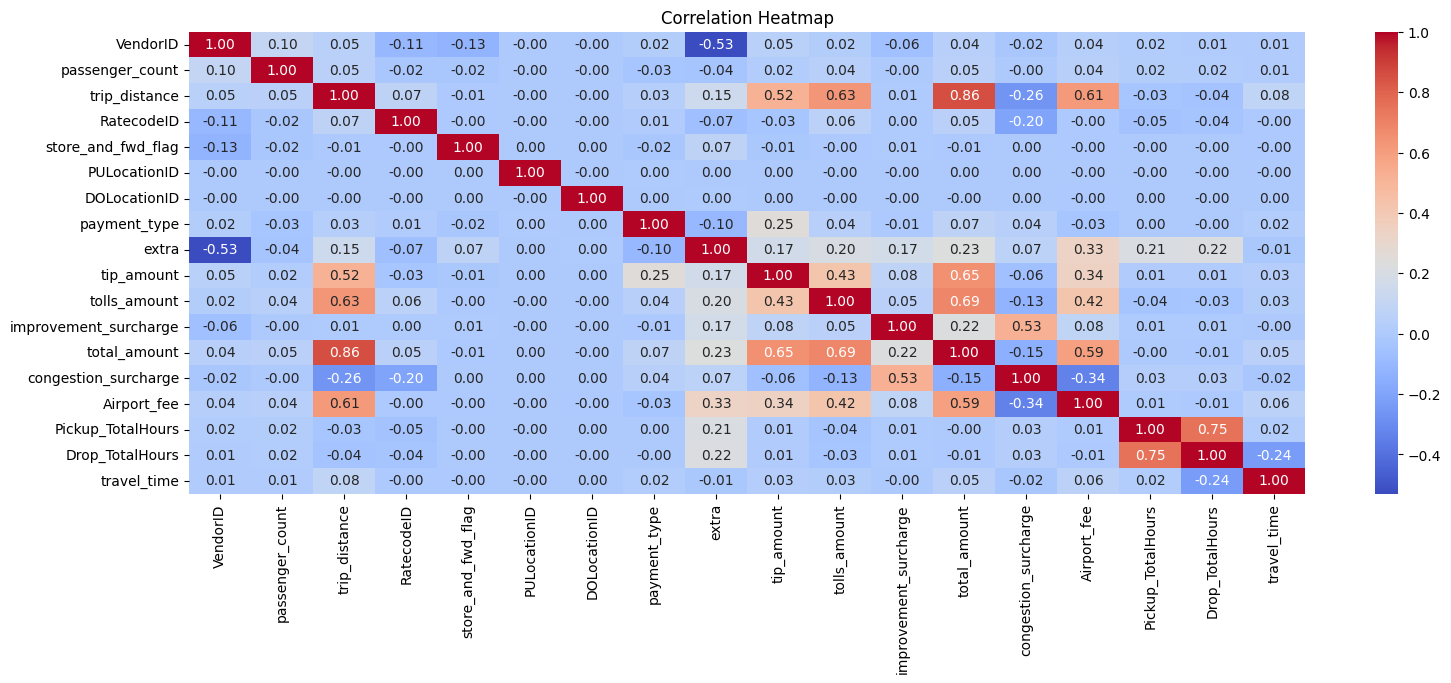

In [54]:
# Create a heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [55]:
corr_matrix = train.corr()

corr_matrix

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Pickup_TotalHours,Drop_TotalHours,travel_time
VendorID,1.000000,0.098384,0.047504,-0.105151,-0.126134,-0.001325,-0.003957,0.020599,-0.530099,0.046361,0.023643,-0.063198,0.039910,-0.023136,0.035896,0.015285,0.012391,0.010547
passenger_count,0.098384,1.000000,0.053784,-0.023625,-0.016415,-0.000811,-0.000714,-0.029064,-0.039065,0.017699,0.041248,-0.002792,0.052547,-0.002279,0.040784,0.024369,0.019676,0.010313
trip_distance,0.047504,0.053784,1.000000,0.071313,-0.008981,-0.000344,-0.004016,0.033532,0.149312,0.521415,0.632382,0.006319,0.859989,-0.262899,0.614199,-0.031899,-0.044517,0.082074
RatecodeID,-0.105151,-0.023625,0.071313,1.000000,-0.004461,-0.001111,-0.000640,0.009657,-0.067301,-0.032852,0.060593,0.002404,0.054095,-0.197598,-0.004479,-0.046629,-0.039379,-0.004685
store_and_fwd_flag,-0.126134,-0.016415,-0.008981,-0.004461,1.000000,0.000316,0.001455,-0.020037,0.069782,-0.013600,-0.004573,0.006723,-0.007609,0.000395,-0.004677,-0.003132,-0.002647,-0.004588
PULocationID,-0.001325,-0.000811,-0.000344,-0.001111,0.000316,1.000000,-0.000166,0.002485,0.001493,0.001380,-0.000869,-0.000501,0.000814,0.001151,-0.000645,-0.001760,-0.001326,-0.003371
DOLocationID,-0.003957,-0.000714,-0.004016,-0.000640,0.001455,-0.000166,1.000000,0.000845,0.002946,0.000668,-0.002294,-0.002809,-0.002792,0.000626,-0.004854,0.001326,-0.000314,0.000673
payment_type,0.020599,-0.029064,0.033532,0.009657,-0.020037,0.002485,0.000845,1.000000,-0.101786,0.250896,0.038543,-0.007946,0.067726,0.037902,-0.030976,0.001668,-0.001988,0.015151
extra,-0.530099,-0.039065,0.149312,-0.067301,0.069782,0.001493,0.002946,-0.101786,1.000000,0.165808,0.201175,0.170836,0.234625,0.066918,0.331762,0.211368,0.217568,-0.014340
tip_amount,0.046361,0.017699,0.521415,-0.032852,-0.013600,0.001380,0.000668,0.250896,0.165808,1.000000,0.425056,0.078843,0.648593,-0.058586,0.341163,0.012156,0.011077,0.030584


Since a heatmap only gives linear relationships, pair-wise scatter plot is used to check for non linear relaationships with target variables. 

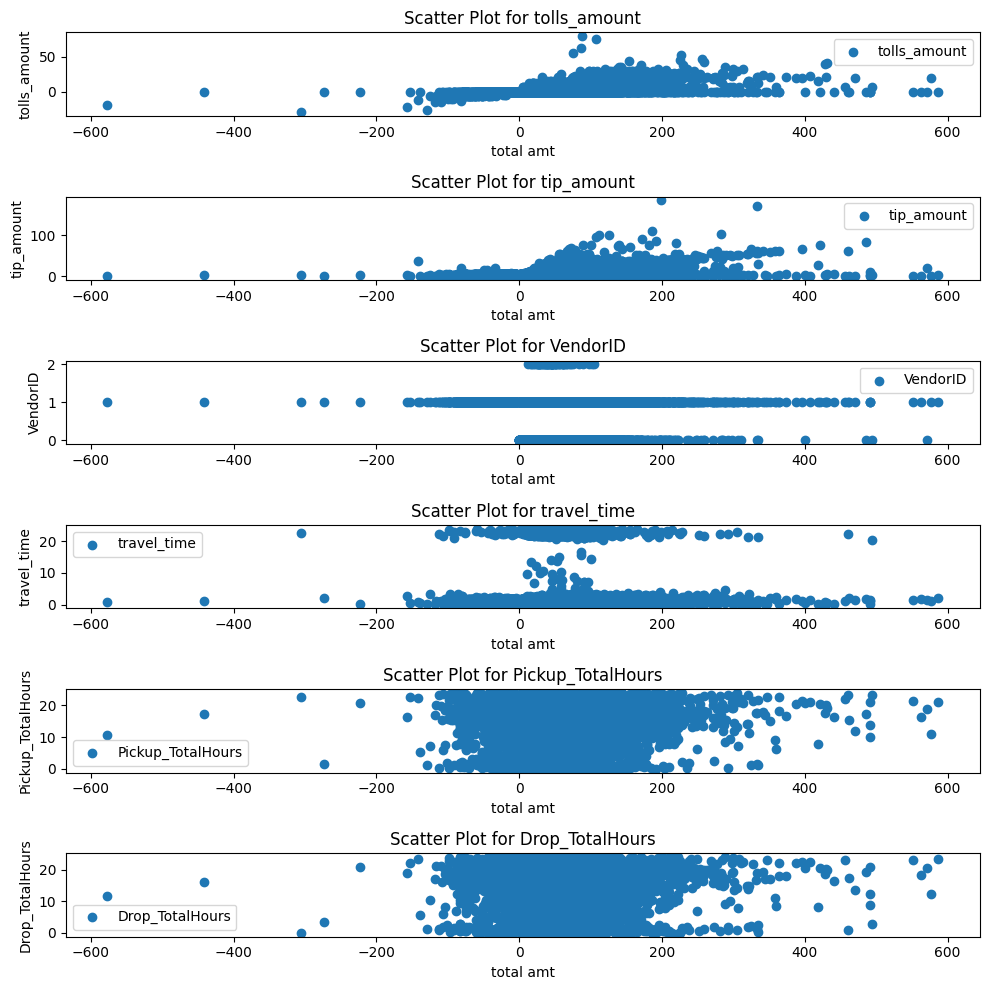

In [56]:

columns_to_plot = ['tolls_amount', 'tip_amount','VendorID','travel_time','Pickup_TotalHours','Drop_TotalHours']

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 10))

for i, column in enumerate(columns_to_plot):
    axes[i].scatter(train['total_amount'], train[column], label=column)

    axes[i].set_xlabel('total amt')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Scatter Plot for {column}')
    
    axes[i].legend()

plt.tight_layout()

plt.show()


Peak hours 


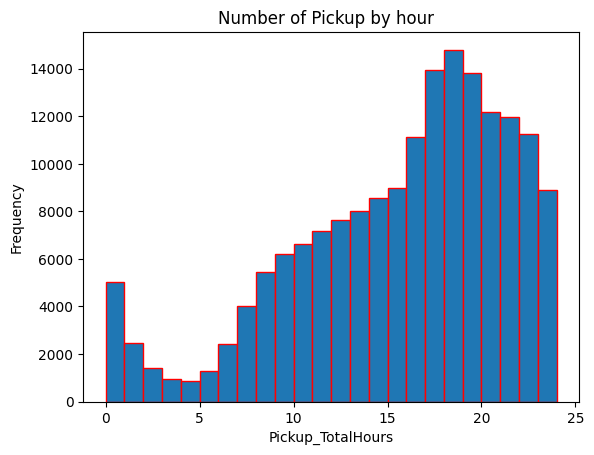

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
plt.hist(train['Pickup_TotalHours'], bins=24, edgecolor='red') 
plt.xlabel('Pickup_TotalHours')
plt.ylabel('Frequency')
plt.title('Number of Pickup by hour  ')
plt.show()

# Splitting For train data

# Inferences from EDA
* Data contained extreme values which did not make any logical sense, hence were removed. 
* Catagorical feature "payment type" had Unknown value, which was replaced with the mode, "Credit Card". 
* None of the features or target show normal distribution. 
* No visible non linear relationship with target 


In [58]:
#Splitting the data into features and target variables .
#Splitting further into training and validation set. 
target = train['total_amount']
features= train.drop(['total_amount'],axis=1)

x_train,x_val,y_train,y_val= train_test_split(features,target,test_size=0.2,random_state=42)
x_train.shape

(139996, 17)

Highlights from EDA:
 


# Model 1 : Linear regression

* Fitting 10 folds for each of 2 candidates, totalling 20 fits
* Best Parameters: {'regressor__fit_intercept': True}
* r2: 0.8781631382435893



heavily affected by multicolinearity where as random forestt and dt are robust to it 


In [59]:

pipeline = Pipeline([
    ('ss', MinMaxScaler()),
    ('regressor', LinearRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__fit_intercept': [True, False]

}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_lr = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Evaluate the best estimator on the test set
Y_pred = best_estimator_lr.predict(x_val)
r2 = r2_score(y_val, Y_pred)
print("r2:", r2)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Parameters: {'regressor__fit_intercept': True}
r2: 0.8781631382435893


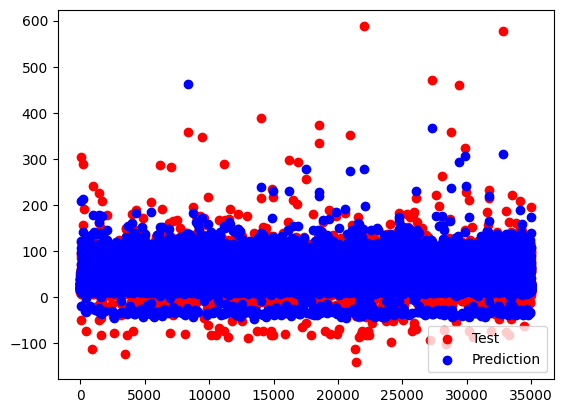

In [60]:
plt.scatter(range(len(y_val)), y_val, color = 'red')
plt.scatter(range(len(Y_pred)),Y_pred,color = 'blue')
plt.legend(['Test','Prediction'],loc='lower right')
plt.show()

# Stochastic Gradient Descent  regressor

* Best Parameters: {'regressor__alpha': 0.01, 'regressor__eta0': 0.5, 'regressor__learning_rate': 'optimal', 'regressor__max_iter': 100, 'regressor__tol': 0.001}
* Mean Squared Error: 9.320107139673798
* R-squared: 0.8034235125337742

In [61]:


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SGDRegressor())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__max_iter': [100, 200,500],
    'regressor__tol': [1e-3, 1e-4],
    'regressor__alpha': [0.0001, 0.001, 0.01],
    'regressor__learning_rate': ['constant', 'optimal', 'invscaling'],
    'regressor__eta0': [0.01, 0.1, 0.5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)


# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_sgd = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the test set using the best estimator
Y_pred = best_estimator_sgd.predict(x_val)

# Evaluate the model
mse = mean_squared_error(y_val, Y_pred)
r2 = r2_score(y_val, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stocha

Best Parameters: {'regressor__alpha': 0.01, 'regressor__eta0': 0.1, 'regressor__learning_rate': 'optimal', 'regressor__max_iter': 200, 'regressor__tol': 0.0001}
Mean Squared Error: 79.28942557078621
R-squared: 0.8779407185637581


# Random Forest

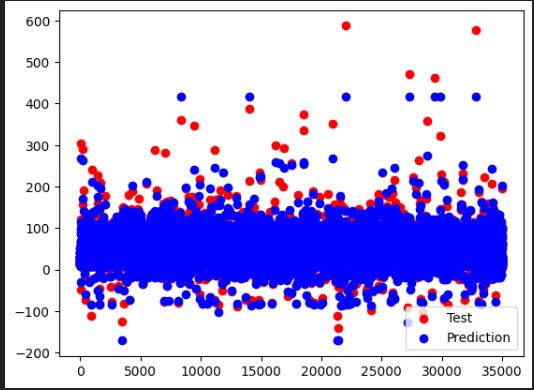

Best Parameters:  {'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 17, 'n_estimators': 24}

R-squared on Training data: 0.9580

Mean Squared Error on Test Set: 27.3029

R-square on test set : 0.92805

In [62]:


# Define the parameter distributions
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Create a RandomizedSearchCV object with r2_score as the scoring metric
random_search = RandomizedSearchCV(
    rf_regressor,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=2,  # Increase verbosity
    random_state=42  # Set a random seed for reproducibility
)

# Assuming X and y are your feature matrix and target variable
# Fit the random search model
random_search.fit(x_train, y_train)

# Print the best parameters and corresponding mean cross-validated score
print("Best Parameters: ", random_search.best_params_)
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# # Assuming X and y are your feature matrix and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the best parameters from the RandomizedSearchCV results
best_params = random_search.best_params_

# Create a RandomForestRegressor with the best parameters
best_rf_regressor = RandomForestRegressor(**best_params)

# Fit the model on the training set
best_rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_rf_regressor.predict(x_val)

# Evaluate the model performance on the test set
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print("R-squared on Test Set: {:.4f}".format(r2))
print("Mean Squared Error on Test Set: {:.4f}".format(mse))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 17, 'n_estimators': 24}
R-squared on Test Set: 0.9579
Mean Squared Error on Test Set: 27.3401


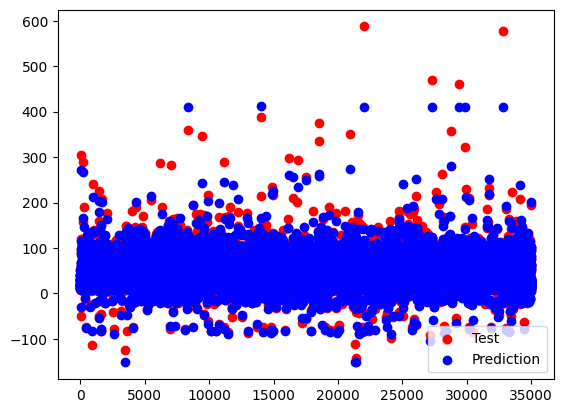

In [63]:
plt.scatter(range(len(y_val)), y_val, color = 'red')
plt.scatter(range(len(y_pred)),y_pred,color = 'blue')
plt.legend(['Test','Prediction'],loc='lower right')
plt.show()

# DT

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

Mean Squared Error: 38.77271767762074

R-squared: 0.9403127210849116

after submission : 0.90894



In [64]:


# Define the decision tree regressor
dt_regressor = DecisionTreeRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1,error_score='raise')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator_dt = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the test set using the best estimator
y_pred = best_estimator_dt.predict(x_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=7, min_samples_leaf=15, min_samples_split=12, n_estimators=81; total time= 1.1min
[CV] END max_depth=7, min_samples_leaf=19, min_samples_split=12, n_estimators=97; total time= 1.3min
[CV] END max_depth=7, min_samples_leaf=19, min_samples_split=12, n_estimators=97; total time= 1.4min
[CV] END max_depth=2, min_samples_leaf=12, min_samples_split=7, n_estimators=139; total time=  33.0s
[CV] END max_depth=2, min_samples_leaf=12, min_samples_split=7, n_estimators=139; total time=  33.5s
[CV] END max_depth=2, min_samples_leaf=12, min_samples_split=7, n_estimators=139; total time=  33.6s
[CV] END max_depth=1, min_samples_leaf=12, min_samples_split=13, n_estimators=98; total time=  12.1s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=17, n_estimators=24; total time=  39.0s
[CV] END max_depth=15, min_samples_leaf=19, min_samples_split=13, n_estimators=64; total time= 1.6min
[CV] END max_depth=3, min_s

# Bagging regressor using DT
# 
* Mean Squared Error: 29.774800183719535
* R-squared: 0.954164244611812
* 0.92977 on submission 


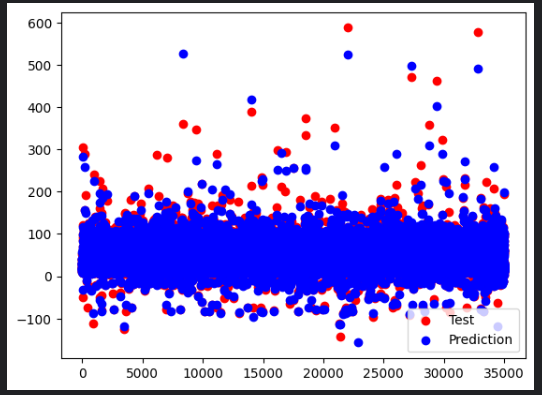


In [65]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

bagging_regressor = BaggingRegressor(base_estimator=pipeline, n_estimators=10, random_state=42)

bagging_regressor.fit(x_train, y_train)

y_pred = bagging_regressor.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_val, y_pred)
print(f'R-squared: {r2}')


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END max_depth=7, min_samples_leaf=15, min_samples_split=12, n_estimators=81; total time= 1.1min
[CV] END max_depth=7, min_samples_leaf=19, min_samples_split=12, n_estimators=97; total time= 1.4min
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=159; total time= 1.3min
[CV] END max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=159; total time= 1.3min
[CV] END max_depth=1, min_samples_leaf=12, min_samples_split=13, n_estimators=98; total time=  12.8s
[CV] END max_depth=1, min_samples_leaf=12, min_samples_split=13, n_estimators=98; total time=  12.3s
[CV] END max_depth=1, min_samples_leaf=12, min_samples_split=13, n_estimators=98; total time=  12.4s
[CV] END max_depth=17, min_samples_leaf=10, min_samples_split=17, n_estimators=24; total time=  38.9s
[CV] END max_depth=15, min_samples_leaf=19, min_samples_split=13, n_estimators=64; total time= 1.6min
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=

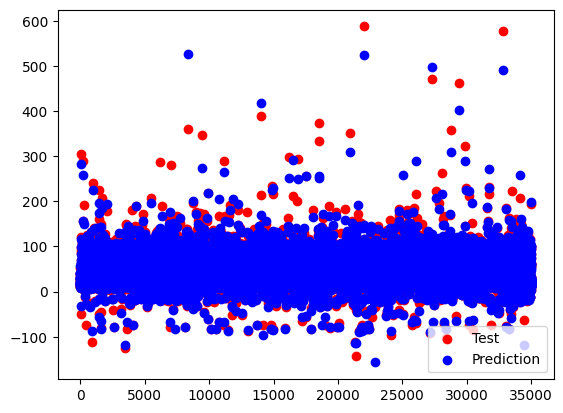

In [66]:
plt.scatter(range(len(y_val)), y_val, color = 'red')
plt.scatter(range(len(y_pred)),y_pred,color = 'blue')
plt.legend(['Test','Prediction'],loc='lower right')
plt.show()

# XGBoost

* Fitting 5 folds for each of 324 candidates, totalling 1620 fits
* Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
* Mean Squared Error: 43.811377658019346
* R-squared: 0.92724872368620R7
* R2 Score after submission0.90921 V7

In [67]:


xgb_regressor = xgb.XGBRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the validation set using the best estimator
y_pred = best_estimator.predict(x_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error: 24.61766872991994
R-squared: 0.9621032069008131


In [68]:
# test.columns

In [69]:
# test=test.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime','pickupdate', 'dropdate'])

In [70]:
# train.columns

In [71]:
# test.shape

# Submissions

In [72]:
# Make predictions on the test set using the best estimator
y_pred1 = best_rf_regressor.predict(test)

output = y_pred1
output

array([34.38758276, 26.06414435, 15.8621484 , ..., 20.87208415,
       35.68586755, 17.9859227 ])

In [73]:
output = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': output})
output

,ID,total_amount
0,1,34.387583
1,2,26.064144
2,3,15.862148
3,4,14.600809
4,5,24.415665
...,...,...
49995,49996,15.255753
49996,49997,27.249630
49997,49998,20.872084
49998,49999,35.685868


In [74]:
output.to_csv("submission.csv", index=False)